<a href="https://colab.research.google.com/github/Woobin-Seo/Python/blob/master/Ipynb/Q_Network_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym

In [0]:
import numpy as np

In [0]:
import random

In [0]:
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [7]:
env = gym.make('FrozenLake-v0')

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [8]:
tf.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph>

In [0]:
inputs1 = tf.placeholder(shape=[1, 16], dtype=tf.float32)

In [0]:
W = tf.Variable(tf.random_uniform([16, 4], 0,0.01)) # 重み設定

In [0]:
Qout = tf.matmul(inputs1, W)

In [0]:
predict = tf.argmax(Qout, 1)

In [0]:
nextQ = tf.placeholder(shape=[1, 4], dtype=tf.float32)

In [0]:
loss = tf.reduce_sum(tf.square(nextQ - Qout))

In [0]:
trainer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)

In [0]:
updateModel = trainer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
y = 0.99
e = 0.1
num_episodes = 5000

In [0]:
jList = []
rList = []

In [20]:
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(num_episodes):
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    
    while j < 99:
      j += 1
      a, allQ = sess.run([predict, Qout], feed_dict = {inputs1: np.identity(16)[s:s+1]})
      
      if np.random.rand(1) < e:
        a[0] = env.action_space.sample()
      
      s1, r, d, _ = env.step(a[0])
      Q1 = sess.run(Qout, feed_dict = {inputs1: np.identity(16)[s1:s1+1]})
      maxQ1 = np.max(Q1)
      targetQ = allQ
      targetQ[0, a[0]] = r + y * maxQ1
      
      _,W1 = sess.run([updateModel, W], feed_dict={inputs1:np.identity(16)[s:s+1], nextQ: targetQ})
      rAll += r
      s = s1
      
      if d == True:
        e = 1.0/((i/50) + 10)
    
    #print(str(i) + "番目の試行を終了しました。")
    jList.append(j) # 試行回数のリスト
    rList.append(rAll) # 報酬のリスト

print("Success Episode Ratio: " + str(sum(rList) / num_episodes * 100) + "%")

Success Episode Ratio: 58.040000000000006%


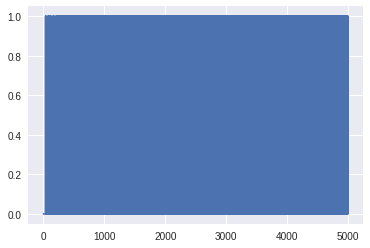

In [21]:
plt.plot(rList)

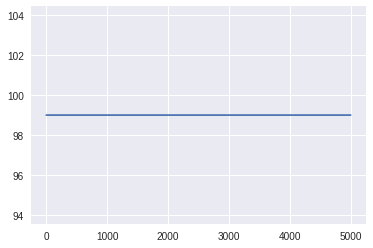

In [22]:
plt.plot(jList)